In [41]:
import pandas as pd
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import re
import numpy as np
import pickle

In [2]:
def custom_tokenizer(string):
    return string.split(' ')

In [3]:
import os
print(os.getcwd())

/home/filip_kaiser/miicare-nlp-test/feat_eng


In [4]:
df = pd.read_csv('../data/data.csv', index_col=0)
df.head()

text  label  binary
0            well at around five eight p.m. i think      17       1
1               oh around half to nine a.m. i think     8.3       1
2  it had to be around two fifty eight p.m. i sup...  14.45       1
3  oh it might have been at around quarter to thr...   2.45       1
4             well at around seven fifty three p.m.   19.45       1

In [5]:
df = df[df['binary'] == 1]

In [6]:
cv= CountVectorizer(ngram_range=(1,3), tokenizer=custom_tokenizer)
ohe = OneHotEncoder()
X = df['text'].apply(lambda x: str(x))
y = df[['label']]

In [45]:
pickle.dump(cv, open('../demo_nb/cv_multi.pkl', 'wb'))
pickle.dump(ohe, open('../demo_nb/ohe.pkl', 'wb'))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
def arr_to_df(transformed, transformer):
    return pd.DataFrame(transformed.toarray(), columns=transformer.get_feature_names())

In [9]:
y_train = ohe.fit_transform(y_train)
y_test = ohe.transform(y_test)

y_train = arr_to_df(y_train, ohe)
y_test = arr_to_df(y_test, ohe)

In [10]:
train = cv.fit_transform(X_train)
test = cv.transform(X_test)

In [11]:
X_train = arr_to_df(train, cv)
X_test = arr_to_df(test, cv)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

In [14]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
pickle.dump(rfc, open('../demo_nb/rfc.pkl', 'wb'))

In [15]:
predicted = rfc.predict(X_test)

In [16]:
predicted = pd.DataFrame(predicted, columns=ohe.get_feature_names())

In [17]:
predicted['label'] = 'x0_no_answ'
for colname in predicted.columns:
     predicted['label'][predicted[colname] == 1.0] = colname

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
y_test['label'] = 'x0_no_answ'
for colname in y_test.columns:
     y_test['label'][y_test[colname] == 1.0] = colname

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
cm = confusion_matrix(y_test['label'], predicted['label'])

In [35]:
y_test['label'].nunique()

96

In [21]:
cm

array([[175,   0,   0, ...,   0,   0,   0],
       [  0, 162,   0, ...,   0,   0,   4],
       [  0,   0, 134, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 140,   0,   7],
       [  0,   0,   0, ...,   0, 160,  18],
       [  0,   0,   0, ...,   0,   0,   0]])

In [22]:
import seaborn as sns

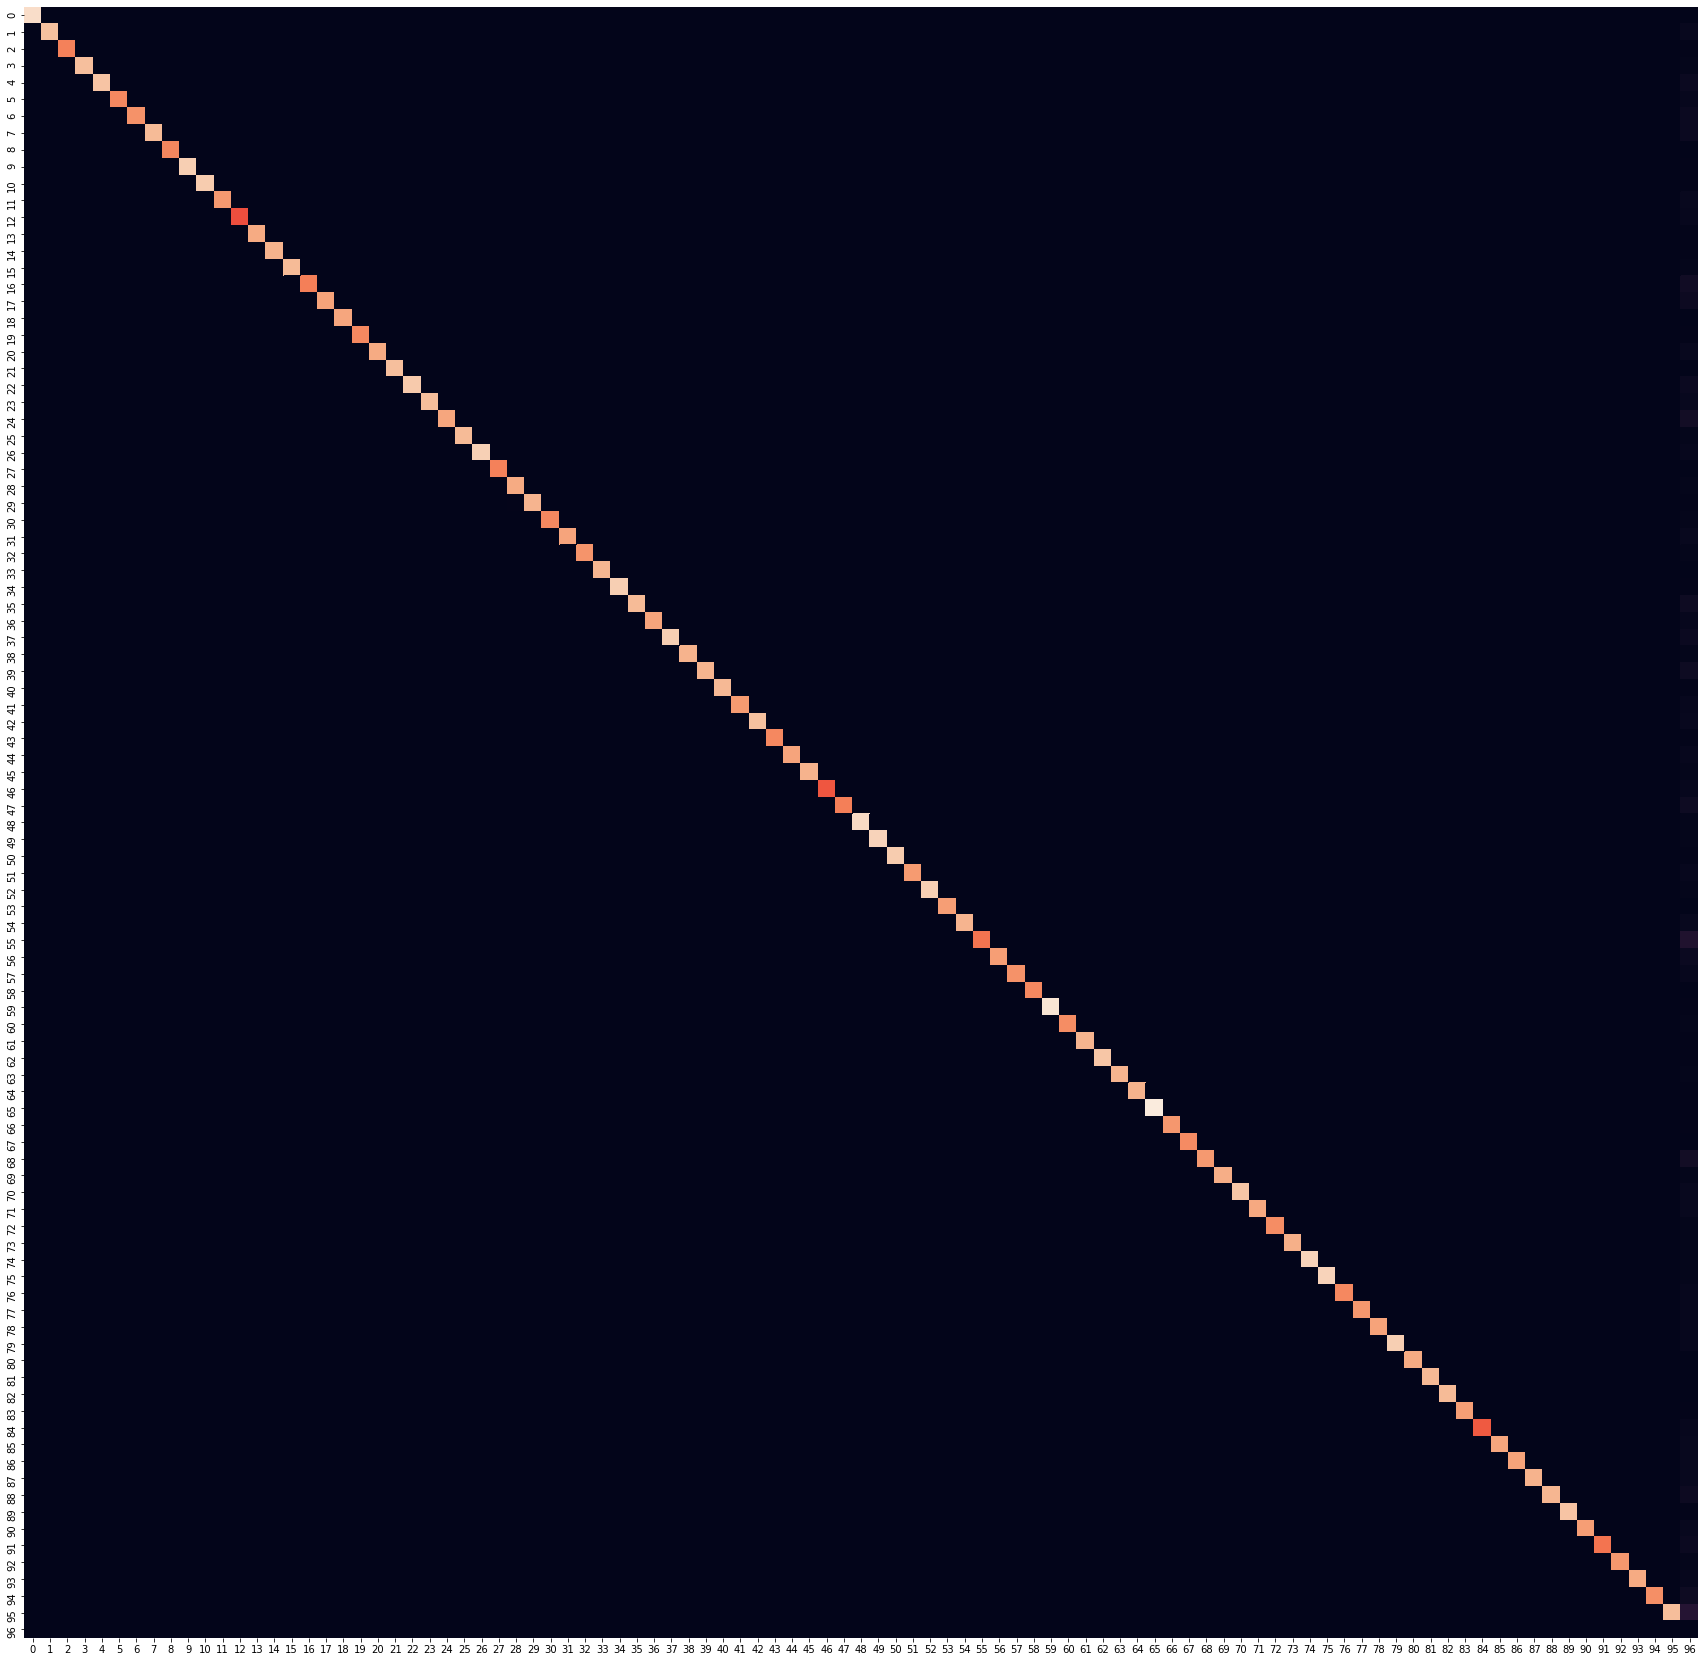

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sns.heatmap(cm, cbar=False)


In [24]:
from sklearn.metrics import multilabel_confusion_matrix

In [25]:
mcm = multilabel_confusion_matrix(y_test.iloc[:,-1], predicted.iloc[:,-1])

In [26]:
def prec(cmat):
    return cmat[1,1]/ (cmat[1,1] + cmat[0,1])

def rec(cmat):
    return cmat[1,1]/ (cmat[1,1] + cmat[1,0])

In [34]:
mcm_dict = {}

for idx, colname in enumerate(predicted.columns[:-1]):
    mcm_dict[colname] = {'precision': prec(mcm[idx]), 'recall': rec(mcm[idx])}

In [28]:
mcm_dict

{'x0_0': {'precision': 1.0, 'recall': 1.0},
 'x0_0.15': {'precision': 1.0, 'recall': 0.9759036144578314},
 'x0_0.3': {'precision': 1.0, 'recall': 0.9925925925925926},
 'x0_0.45': {'precision': 1.0, 'recall': 0.9877300613496932},
 'x0_1': {'precision': 1.0, 'recall': 0.9702380952380952},
 'x0_1.15': {'precision': 1.0, 'recall': 0.9785714285714285},
 'x0_1.3': {'precision': 1.0, 'recall': 0.9657534246575342},
 'x0_1.45': {'precision': 1.0, 'recall': 0.9695121951219512},
 'x0_10': {'precision': 1.0, 'recall': 1.0},
 'x0_10.15': {'precision': 1.0, 'recall': 0.9940828402366864},
 'x0_10.3': {'precision': 1.0, 'recall': 0.9940476190476191},
 'x0_10.45': {'precision': 1.0, 'recall': 0.972972972972973},
 'x0_11': {'precision': 1.0, 'recall': 0.9745762711864406},
 'x0_11.15': {'precision': 1.0, 'recall': 0.9934640522875817},
 'x0_11.3': {'precision': 1.0, 'recall': 0.9935897435897436},
 'x0_11.45': {'precision': 1.0, 'recall': 0.9875776397515528},
 'x0_12': {'precision': 1.0, 'recall': 0.943262

In [29]:
(predicted['label'] == y_test['label']).mean()

0.9805387205387205

In [30]:
df['label'].value_counts()

21.45    513
7.45     507
17.15    503
20       503
4.3      502
        ... 
9.3      431
15.3     431
23.45    426
20.15    420
11       396
Name: label, Length: 96, dtype: int64

In [31]:
def predict_hour(sentence):
    vec_rep = cv.transform([sentence]).toarray()
    prediction = rfc.predict(vec_rep)
    np.where(prediction == 1.0)
    names = ohe.get_feature_names()
    return names[np.argmax(prediction)]

In [32]:
predict_hour('around at four fifty five p.m. i suppose')

'x0_16.45'